# <center><br> Анализ данных по доходу населения UCI Adult</center>

Автор материала: Юрий Кашницкий, программист-исследователь Mail.Ru Group

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult).

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/adult.data.csv')
data['salary'].unique()


array(['<=50K', '>50K'], dtype=object)

**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [3]:
# Ваш код здесь
total = len(data)
male = len(data[data['sex'] == 'Male'])
female = len(data[data['sex'] == 'Female'])

print(f"Всего: {total}\nМужчин: {male}\nЖенщин: {female}")


Всего: 32561
Мужчин: 21790
Женщин: 10771


**2. Каков средний возраст (признак *age*) женщин?**

In [4]:
# Ваш код здесь
female_mean = data[data['sex'] == 'Female']['age'].mean()
print(f"Средний возраст женщин: {female_mean:.1f}")


Средний возраст женщин: 36.9


**3. Какова доля граждан Германии (признак *native-country*)?**

In [5]:
# Ваш код здесь
germans = data[data['native-country'] == 'Germany']
germans_pct = (len(germans) / len(data)) * 100
print(f"Доля граждан Германии: {germans_pct:.2f}%")

Доля граждан Германии: 0.42%


**4. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [6]:
# Ваш код здесь
high_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
high_earners = data[data['salary'] == '>50K']
low_education_high_earners = high_earners[~high_earners['education'].isin(high_education)]
print(f"Людей с зарплатой >50K без высшего образования: {len(low_education_high_earners)} из {len(high_earners)}")
print(f"Процент: {(len(low_education_high_earners) / len(high_earners)) * 100:.2f}%")
(len(low_education_high_earners) / len(high_earners) * 100) == 0

Людей с зарплатой >50K без высшего образования: 3306 из 7841
Процент: 42.16%


False

**5. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [7]:
# Ваш код здесь
max_hours = data['hours-per-week'].max()
print(f"Максимальное количество часов работы в неделю: {max_hours}")
max_hours_workers = data[data['hours-per-week'] == max_hours]
print(f"Количество людей, работающих {max_hours} часов: {len(max_hours_workers)}")
high_earners_max_hours = max_hours_workers[max_hours_workers['salary'] == '>50K']
print(f"Процент зарабатывающих >50K среди них: {(len(high_earners_max_hours) / len(max_hours_workers)) * 100:.2f}%")

Максимальное количество часов работы в неделю: 99
Количество людей, работающих 99 часов: 85
Процент зарабатывающих >50K среди них: 29.41%


## <center>Практическое задание. Визуальный анализ данных по пассажирам "Титаника".

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Считываем обучающую выборку.**

In [9]:
train_df = pd.read_csv("data/titanic_train.csv", 
                       index_col='PassengerId') 

In [10]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Выкинем признак `Cabin`, а потом – все строки, где есть пропуски.**

In [13]:
train_df = train_df.drop('Cabin', axis=1).dropna()

**Постройте попарные зависимости признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

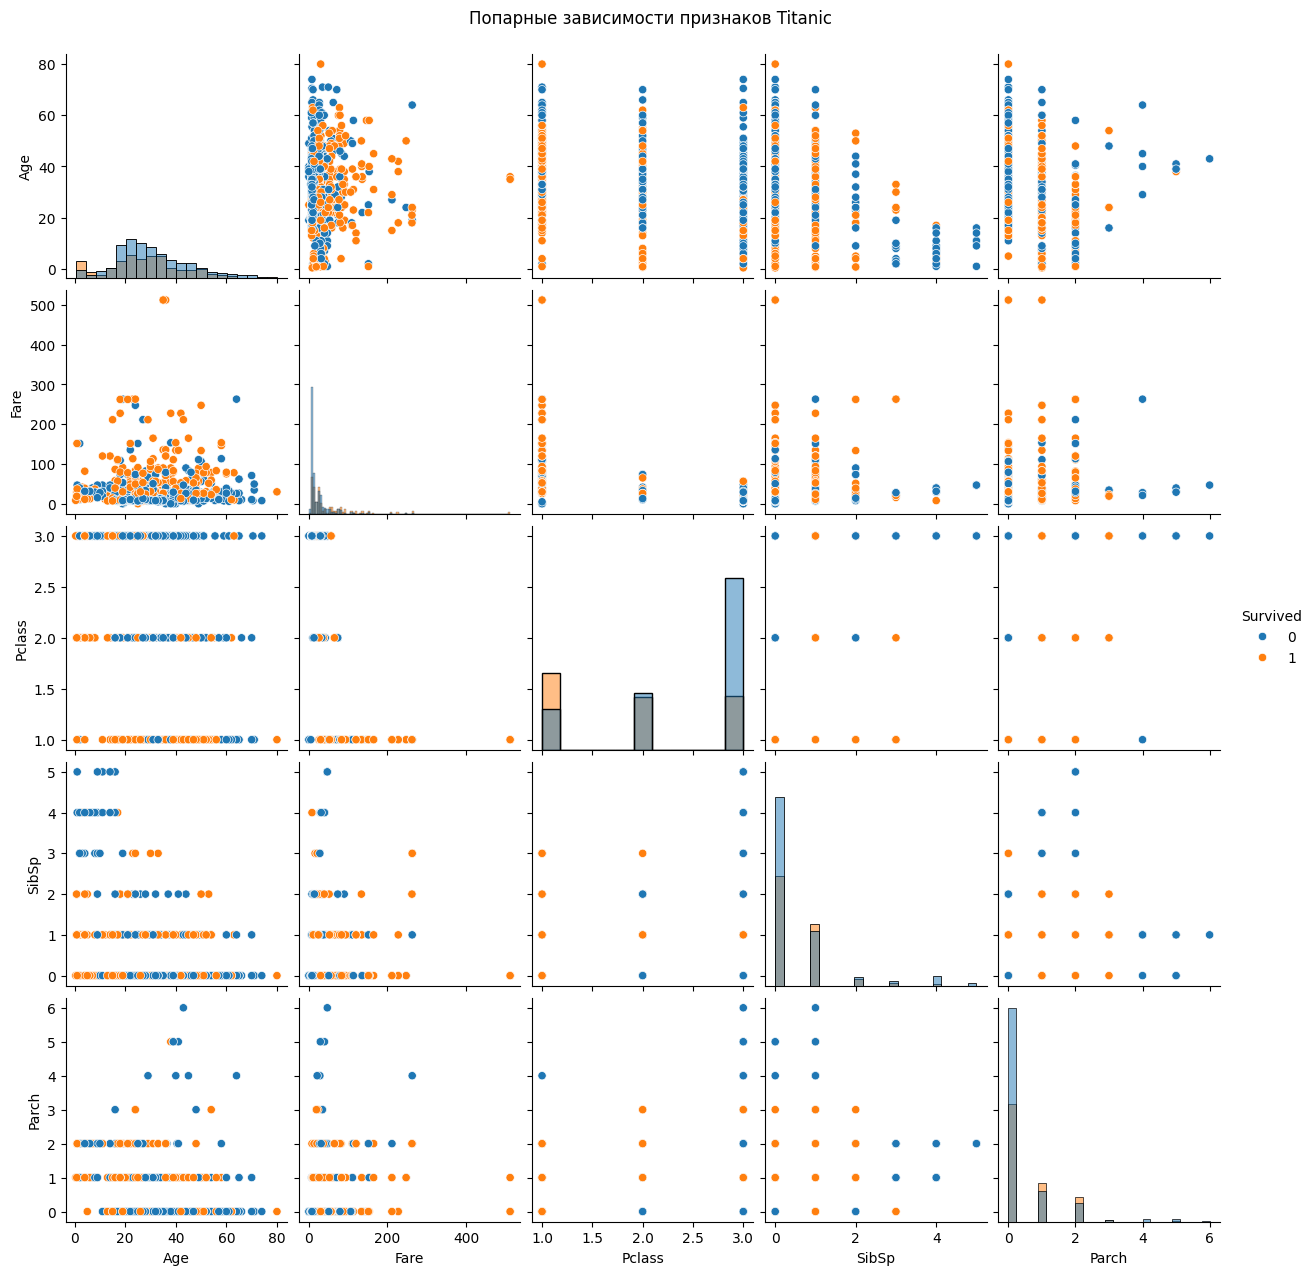

ValueError: No variables found for grid columns.

In [ ]:
# Ваш код здесь
# Выбираем числовые столбцы для визуализации
numeric_cols = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived']

# Построим pairplot для числовых признаков
sns.pairplot(train_df[numeric_cols], hue='Survived', diag_kind='hist')
plt.suptitle('Попарные зависимости признаков Titanic', y=1.02)
plt.show()

# Для категориальных признаков построим отдельные графики
# Sex vs Survived и Embarked vs Survived
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# График 1: Sex vs Survived
sns.countplot(data=train_df, x='Sex', hue='Survived', ax=axes[0], palette='Set1')
axes[0].set_title('Соотношение выживших и погибших по полу')
axes[0].set_xlabel('Пол')
axes[0].set_ylabel('Количество')
axes[0].legend(['Погибшие', 'Выжившие'], title='Статус')

# График 2: Embarked vs Survived
sns.countplot(data=train_df, x='Embarked', hue='Survived', ax=axes[1], palette='Set2')
axes[1].set_title('Соотношение выживших и погибших по порту посадки')
axes[1].set_xlabel('Порт посадки (Embarked)')
axes[1].set_ylabel('Количество')
axes[1].legend(['Погибшие', 'Выжившие'], title='Статус')

plt.tight_layout()
plt.show()


**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

In [ ]:
# Ваш код здесь
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Pclass', y='Fare', palette='Set2')
plt.title('Зависимость платы за билет от класса каюты')
plt.xlabel('Класс каюты (Pclass)')
plt.ylabel('Плата за билет (Fare)')
plt.grid(True, alpha=0.3)
plt.show()

# Также выведем средние значения
print("\nСредние значения платы за билет по классам:")
print(train_df.groupby('Pclass')['Fare'].mean())

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

In [ ]:
# Ваш код здесь
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='Set1')
plt.title('Соотношение погибших и выживших в зависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.legend(['Погибшие', 'Выжившие'], title='Статус')
plt.grid(True, alpha=0.3, axis='y')
plt.show()

# Выведем процент выживаемости по полу
print("\nПроцент выживаемости по полу:")
survival_by_sex = train_df.groupby(['Sex', 'Survived']).size().unstack()
survival_pct = (survival_by_sex[1] / (survival_by_sex[0] + survival_by_sex[1]) * 100)
print(survival_pct)

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

In [ ]:
# Ваш код здесь
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Pclass', hue='Survived', palette='Set2')
plt.title('Соотношение погибших и выживших в зависимости от класса каюты')
plt.xlabel('Класс каюты')
plt.ylabel('Количество')
plt.legend(['Погибшие', 'Выжившие'], title='Статус')
plt.grid(True, alpha=0.3, axis='y')
plt.show()

# Выведем процент выживаемости по классу
print("\nПроцент выживаемости по классу каюты:")
survival_by_class = train_df.groupby(['Pclass', 'Survived']).size().unstack()
survival_pct_class = (survival_by_class[1] / (survival_by_class[0] + survival_by_class[1]) * 100)
print(survival_pct_class)

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

In [ ]:
# Ваш код здесь
# Проверка предположения о том, что молодые чаще выживали
plt.figure(figsize=(15, 5))

# График 1: Распределение возраста выживших и погибших
plt.subplot(1, 3, 1)
sns.histplot(data=train_df, x='Age', hue='Survived', bins=30, kde=True, palette='Set1')
plt.title('Распределение возраста выживших и погибших')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend(['Выжившие', 'Погибшие'])

# График 2: Сравнение возрастных групп
train_df['Age_Group'] = pd.cut(train_df['Age'], bins=[0, 30, 60, 100], labels=['Молодые (<30)', 'Средний возраст', 'Пожилые (>60)'])
plt.subplot(1, 3, 2)
sns.countplot(data=train_df, x='Age_Group', hue='Survived', palette='Set2')
plt.title('Выживаемость по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество')
plt.legend(['Погибшие', 'Выжившие'], title='Статус')
plt.xticks(rotation=45, ha='right')

# График 3: Процент выживаемости по возрастным группам
survival_by_age = train_df.groupby(['Age_Group', 'Survived']).size().unstack()
survival_pct_age = (survival_by_age[1] / (survival_by_age[0] + survival_by_age[1]) * 100)
plt.subplot(1, 3, 3)
sns.barplot(x=survival_pct_age.index, y=survival_pct_age.values, palette='viridis')
plt.title('Процент выживаемости по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Процент выживших (%)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Выведем статистику
print("\nПроцент выживаемости по возрастным группам:")
print(survival_pct_age)
print(f"\nСредний возраст выживших: {train_df[train_df['Survived']==1]['Age'].mean():.1f} лет")
print(f"Средний возраст погибших: {train_df[train_df['Survived']==0]['Age'].mean():.1f} лет")

# Проверка статистической значимости с помощью t-теста
survived_ages = train_df[train_df['Survived']==1]['Age']
died_ages = train_df[train_df['Survived']==0]['Age']
t_stat, p_value = stats.ttest_ind(survived_ages, died_ages)
print(f"\nT-статистика: {t_stat:.3f}, p-value: {p_value:.3f}")
if p_value < 0.05:
    print("Разница в возрасте выживших и погибших статистически значима (p < 0.05)")
else:
    print("Разница в возрасте выживших и погибших не является статистически значимой")

# Удалим временную колонку
train_df = train_df.drop('Age_Group', axis=1)